In [1]:
import pandas as pd
from datetime import datetime
from datetime import timedelta
import ipywidgets.widgets as wdg
from IPython.display import display
import pyfas as fa

In [2]:
tags = ('CMS_AP-FI-2900-3',
        'CMS_AP-FI-2903-1',
        'CMS_AP-FI-2904-1',
        'CMS_AP-FI-2903-2',
        'CMS_AP-FI-2904-2',
        )

In [15]:
def extraction():
    label, uom, y = fa.PI_read(server_wdg.value,
                               tags_wdg.value, 
                               start_time, 
                               final_time, 
                               int(freq_wdg.value))
    time = np.linspace(0, (final_time - start_time).days, len(y))
    return label, uom, y   

def on_click_plt_button(b):
    label, uom, y = extraction()
    time = np.linspace(0, (final_time - start_time).days, len(y))
    %matplotlib inline
    plt.plot(time, y)
    plt.xlabel('Time [Days]')
    plt.ylabel('uom')
    plt.title(label)

def on_click_extract_button(b):
    label, uom, y = extraction()
    time = np.linspace(0, (final_time - start_time).days, len(y))
    header = "data [{}]".format(uom)
    df = pd.DataFrame()
    df["Time [days]"] = time    
    df[header] = y
    df.to_excel("data.xlsx")

In [16]:
user_wdg = wdg.Text(description="User (opt.)", value="")
pass_wdg = wdg.Text(description="Pass (opt.)", value="")
hbox_0 = wdg.HBox(children=(user_wdg, pass_wdg))
display(hbox_0)

In [17]:
server_wdg = wdg.Dropdown(description="Server", options=("EPUKPI2", ))
tags_wdg = wdg.Dropdown(description="Tag", options=tags)
freq_wdg = wdg.Text(description="Freq. [Hz]", value="1800")
hbox_1 = wdg.HBox(children=(freq_wdg, server_wdg, tags_wdg))
display(hbox_1)

In [18]:
year_i_wdg = wdg.Text(description="Year i", value=("2014"))
month_i_wdg = wdg.Text(description="Month i", value=("01"))
day_i_wdg = wdg.Text(description="Day i", value=("12"))
vbox_i = wdg.VBox(children=(year_i_wdg, month_i_wdg, day_i_wdg))
start_time = datetime(int(year_i_wdg.value),
                      int(month_i_wdg.value),
                      int(day_i_wdg.value),
                      )
year_f_wdg = wdg.Text(description="Year f", value=("2014"))
month_f_wdg = wdg.Text(description="Month f", value=("02"))
day_f_wdg = wdg.Text(description="Day f", value=("12"))
vbox_f = wdg.VBox(children=(year_f_wdg, month_f_wdg, day_f_wdg))
final_time = datetime(int(year_f_wdg.value),
                      int(month_f_wdg.value),
                      int(day_f_wdg.value),
                      )
hbox_2 = wdg.HBox(children=(vbox_i, vbox_f))
display(hbox_2)

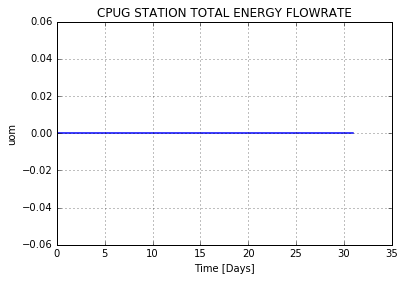

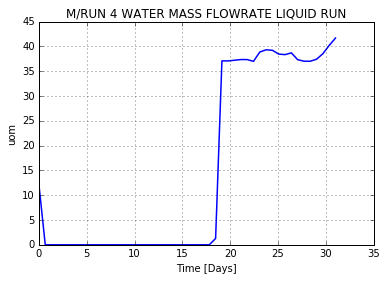

In [19]:
plot_wdg = wdg.Button(description="Plot", font_size=20, border_color="black")
plot_wdg.on_click(on_click_plt_button)
plot_wdg

In [20]:
to_xl_wdg = wdg.Button(description="To excel", font_size=20, border_color="black")
to_xl_wdg.on_click(on_click_extract_button)
to_xl_wdg